In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
import pickle


In [2]:


def show_spectrogram (file,n_fft,n_mels,hop_lenght):
    time = time_limit
    start_time = float(file.split('/')[2].split('_')[0])
    audio, sr = librosa.load(file,sr=4000 )
    audio = audio[sr*time:sr*time*2]
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_fft= n_fft,n_mels=n_mels,hop_length=hop_lenght)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram ,ref=np.max)
    print(mel_spectrogram_db.shape)
    fig, ax = plt.subplots(figsize=(5,2))
    a =librosa.display.specshow(mel_spectrogram_db,
                            x_axis='time',
                            y_axis='linear',
                            sr=sr,
                            hop_length=512,
                            )
    plt.title("Audio Spectrogram Representation")
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()


In [3]:
def show_history():
    # Lấy giá trị accuracy và loss từ history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))

    # Biểu đồ cho độ chính xác
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
    plt.legend()

    # Biểu đồ cho mất mát
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()

In [4]:
""" 
/training_data_all
        --->Unknown
        --->Absent
        --->Present
"""

' \n/training_data_all\n        --->Unknown\n        --->Absent\n        --->Present\n'

In [5]:
def get_label(label):
    # print(folders)
    y_data.append(label)

def create_data (audio,n_fft,n_mels,hop_length):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_fft= n_fft ,n_mels=n_mels,hop_length=hop_length)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram ,ref=np.max)
    w,h= mel_spectrogram_db.shape
    mel_spectrogram_db = mel_spectrogram_db.reshape([w,h,1])
    x_data.append(mel_spectrogram_db)

def get_date(name_files,file,time_limit,sr):
    start_time = float(name_files.split('/')[2].split('_')[0])
    # print(start_time)
    audio, sr = librosa.load(name_files, sr=sr)
    segment_length = time_limit * sr
    num_segments = (len(audio) // segment_length)
    for i in range(num_segments):
        start_sample = i * segment_length
        end_sample = (i + 1) * segment_length
        segment = audio[start_sample:end_sample]

        create_data(segment,n_fft,n_mels,hop_length)

        label = name_files.split('/')[1]
        get_label(label)

(64, 64)


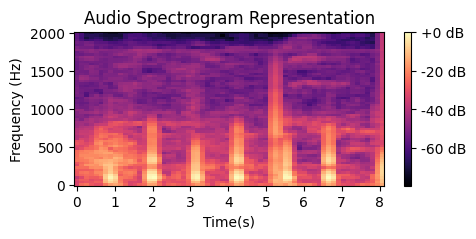

(64, 64)


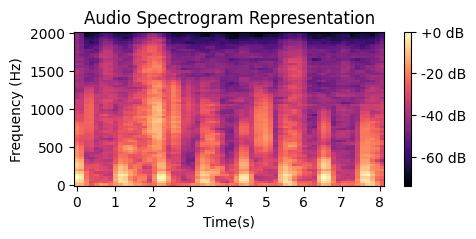

(64, 64)


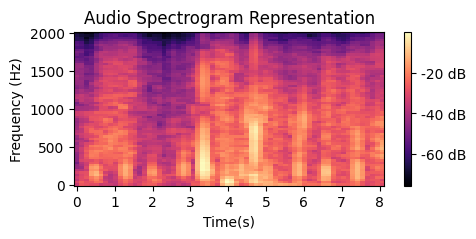

In [6]:
time_limit = 2
sr = 4000
n_fft = 512
n_mels= 64
hop_length = 126
def show (n_fft ,n_mels,hop_lenght,time_limit):
    audio_file_absent = "training_data_all/Absent/0.04025_49970_MV.wav"
    audio_file_present = "training_data_all/Present/0.16025_68374_MV.wav"
    audio_file_unknown = "training_data_all/Unknown/0.83_85081_MV.wav"
    show_spectrogram(audio_file_absent,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
    show_spectrogram(audio_file_present,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
    show_spectrogram(audio_file_unknown,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
show(n_fft,n_mels,hop_length,time_limit)

In [7]:
data_train = 'training_data_all'

x_data = []
y_data = []

for folders in os.listdir(data_train):
    print(folders)
    name_folders = os.path.join(data_train,folders)
    for file in os.listdir(name_folders):
        name_files = os.path.join(name_folders,file)
        get_date(name_files,file,time_limit = time_limit,sr = 4000)

file_save = open('data_file.csv','wb')
pickle.dump((x_data,y_data),file_save)
file_save.close()

Unknown
Absent
Present


In [8]:
file_save = open('data_file.csv', 'rb')
data = pickle.load(file_save)
x_data,y_data =data
file_save.close()
x_data=np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(20543, 64, 64, 1)
(20543,)


In [9]:

x_train_all = []
y_train_all = []
for i in range(4):
    test_size = float(1/(5-i))
    sss = StratifiedShuffleSplit(n_splits=1, test_size= test_size, random_state=68)

    for train_index, test_index in sss.split(x_data, y_data):
        x_data, x_train = x_data[train_index], x_data[test_index]
        y_data, y_train = y_data[train_index], y_data[test_index]

        x_train_all.append(np.array(x_train))
        y_train_all.append(np.array(y_train))
x_train_all.append(np.array(x_data))
y_train_all.append(np.array(y_data))

file_data_split = open('data_split.csv','wb')
pickle.dump((x_train_all,y_train_all),file_data_split)
file_data_split.close()

In [10]:
from collections import Counter

counters = Counter(y_data)

for value, count in counters.items():
    print(f"{value} xuất hiện {count}")
    
counters = Counter(y_train_all[4])
print("\n")
for value, count in counters.items():
    print(f"{value} xuất hiện {count}")


Unknown xuất hiện 332
Absent xuất hiện 2466
Present xuất hiện 1310


Unknown xuất hiện 332
Absent xuất hiện 2466
Present xuất hiện 1310
